# TFLite Image Classification - MobileNet v1

Shobhit Kumar - 19MCME16

In [1]:
!pwd

/home/shobhit/Windows/COURSES/Sem-8/IoT/Assignment/Assignment-2/Git/Q4_TFL


### Installing Libraries

In [2]:
pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement tflite-runtime (from versions: none)
ERROR: No matching distribution found for tflite-runtime
Note: you may need to restart the kernel to use updated packages.


### Importing Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tflite_runtime.interpreter as tflite

### Load Model

In [3]:
!mkdir models
%cd models
!wget https://storage.googleapis.com/download.tensorflow.org/models/tflite/mobilenet_v1_1.0_224_quant_and_labels.zip
!unzip mobilenet_v1_1.0_224_quant_and_labels

/home/shobhit/Windows/COURSES/Sem-8/IoT/Assignment/Assignment-2/Git/Q4_TFL/models
--2023-04-19 22:48:17--  https://storage.googleapis.com/download.tensorflow.org/models/tflite/mobilenet_v1_1.0_224_quant_and_labels.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.196.16, 142.250.196.48, 142.250.196.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.196.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3069250 (2.9M) [application/zip]
Saving to: ‘mobilenet_v1_1.0_224_quant_and_labels.zip’

mobilenet_v1_1.0_22 100%[===================>]   2.93M  4.87MB/s    in 0.6s    

2023-04-19 22:48:19 (4.87 MB/s) - ‘mobilenet_v1_1.0_224_quant_and_labels.zip’ saved [3069250/3069250]

Archive:  mobilenet_v1_1.0_224_quant_and_labels.zip
  inflating: labels_mobilenet_quant_v1_224.txt  
   creating: __MACOSX/
  inflating: __MACOSX/._labels_mobilenet_quant_v1_224.txt  
  inflating: mobilenet_v1_1.0_224_quant.tflite  
  inflating:

In [27]:
!ls

labels_mobilenet_quant_v1_224.txt  mobilenet_v1_1.0_224_quant_and_labels.zip
__MACOSX			   mobilenet_v1_1.0_224_quant.tflite


In [9]:
interpreter = tflite.Interpreter(
    model_path = './models/mobilenet_v1_1.0_224_quant.tflite'
)
interpreter.allocate_tensors()

In [10]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [11]:
input_details

[{'name': 'input',
  'index': 88,
  'shape': array([  1, 224, 224,   3], dtype=int32),
  'shape_signature': array([  1, 224, 224,   3], dtype=int32),
  'dtype': numpy.uint8,
  'quantization': (0.0078125, 128),
  'quantization_parameters': {'scales': array([0.0078125], dtype=float32),
   'zero_points': array([128], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [12]:
output_details

[{'name': 'MobilenetV1/Predictions/Reshape_1',
  'index': 87,
  'shape': array([   1, 1001], dtype=int32),
  'shape_signature': array([   1, 1001], dtype=int32),
  'dtype': numpy.uint8,
  'quantization': (0.00390625, 0),
  'quantization_parameters': {'scales': array([0.00390625], dtype=float32),
   'zero_points': array([0], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

### Load Labels

In [13]:
def load_labels(path):
  with open(path, 'r') as f:
    return {i: line.strip() for i, line in enumerate(f.readlines())}

labels = load_labels('./models/labels_mobilenet_quant_v1_224.txt')

print(f"Type: {type(labels)}")
print(f"Length: {len(labels)}")

for x in range(10):
  print(x, labels.get(x))

Type: <class 'dict'>
Length: 1001
0 background
1 tench
2 goldfish
3 great white shark
4 tiger shark
5 hammerhead
6 electric ray
7 stingray
8 cock
9 hen


### Input Size & Shape

In [15]:
input_shape = input_details[0]['shape']
image_size = input_shape[:2] if len(input_shape) == 3 else input_shape[1:3]

print(image_size)

width, height = image_size[0], image_size[1]
width, height

[224 224]


(224, 224)

### Preprocessing Image

In [25]:
def preprocess(image_path):
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  image = cv2.resize(image, (width, height))
  plt.imshow(image)
  plt.show()

  input_data = np.expand_dims(image, axis = 0)

  return input_data

array([[[[ 18,  17,  22],
         [ 17,  17,  22],
         [ 17,  22,  23],
         ...,
         [ 11,   9,  12],
         [ 10,  10,  12],
         [  9,   8,  12]],

        [[ 15,  13,  20],
         [ 14,  14,  20],
         [ 16,  17,  21],
         ...,
         [ 11,   9,  12],
         [ 12,   9,  12],
         [ 12,   7,  10]],

        [[ 14,  13,  21],
         [ 14,  15,  21],
         [ 15,  14,  20],
         ...,
         [ 12,  10,  14],
         [ 12,  10,  13],
         [ 11,   8,  11]],

        ...,

        [[ 85, 135, 133],
         [ 86, 135, 134],
         [ 85, 134, 134],
         ...,
         [ 95, 129, 125],
         [ 95, 127, 124],
         [ 91, 123, 117]],

        [[ 86, 135, 131],
         [ 85, 133, 133],
         [ 87, 135, 133],
         ...,
         [ 94, 126, 123],
         [ 92, 124, 121],
         [ 89, 121, 116]],

        [[ 83, 134, 130],
         [ 83, 133, 132],
         [ 83, 133, 132],
         ...,
         [ 94, 125, 121],
        

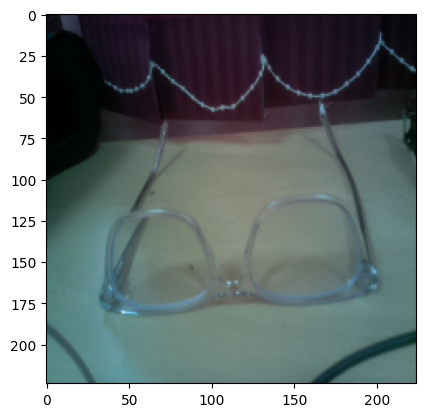

In [17]:
image_path = './images/19mcme16_pic1.jpg'
preprocess(image_path)

### Testing

In [18]:
def image_classify(image, labels, top_k=5):
  interpreter.set_tensor(input_details[0]['index'], image)
  interpreter.invoke()

  predictions = interpreter.get_tensor(output_details[0]['index'])[0]

  top_k_indices = np.argsort(predictions)[::-1][:top_k]

  print("\n\t[Prediction]     [Probability]\n")
  for i in range(top_k):
    print("\t{:20}: {}%".format(
        labels[top_k_indices[i]],
        int((predictions[top_k_indices[i]]/255.0)*100)
    ))

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.78 µs

	[Prediction]     [Probability]

	oxygen mask         : 80%
	shower curtain      : 1%
	stethoscope         : 1%
	snorkel             : 1%
	oscilloscope        : 1%


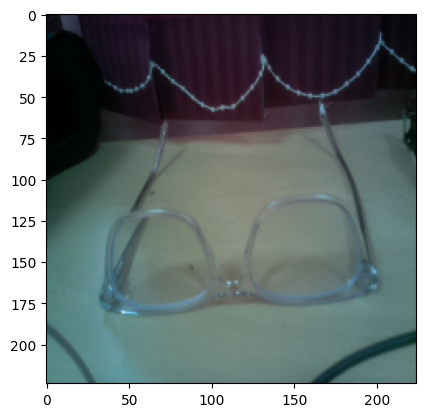

In [19]:
%time
image_path = './images/19mcme16_pic1.jpg'
image = preprocess(image_path)
image_classify(image, labels)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 21.7 µs


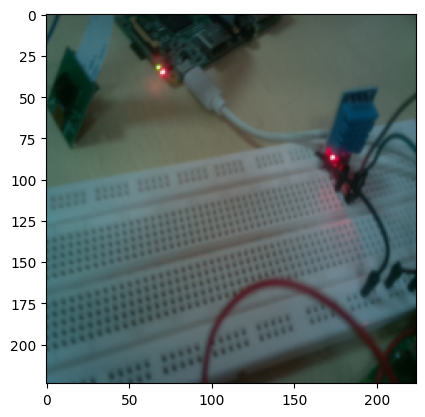


	[Prediction]     [Probability]

	stopwatch           : 56%
	oscilloscope        : 14%
	sewing machine      : 4%
	modem               : 3%
	pencil box          : 3%
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


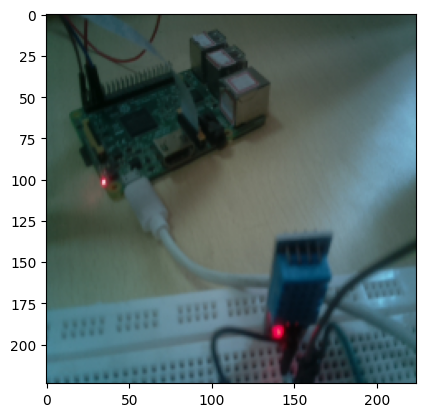


	[Prediction]     [Probability]

	modem               : 83%
	oscilloscope        : 7%
	sewing machine      : 1%
	desk                : 1%
	joystick            : 1%
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs


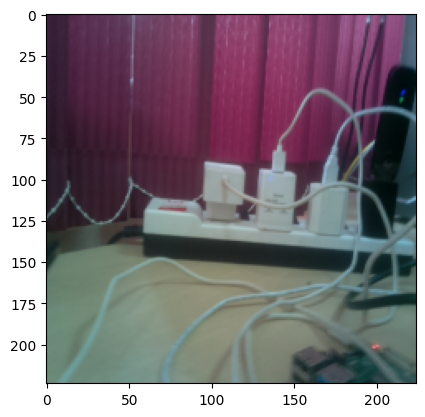


	[Prediction]     [Probability]

	iron                : 20%
	modem               : 14%
	vacuum              : 12%
	iPod                : 9%
	mouse               : 7%
CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.3 µs


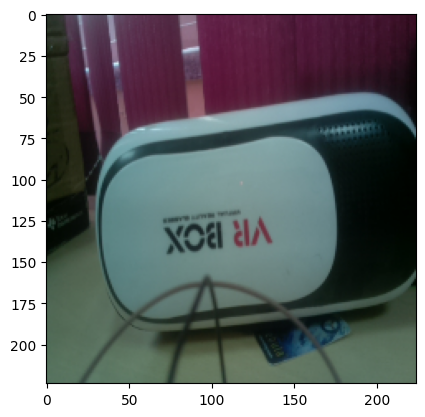


	[Prediction]     [Probability]

	modem               : 29%
	sunglasses          : 14%
	pencil box          : 10%
	folding chair       : 3%
	car mirror          : 3%
CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 11.2 µs


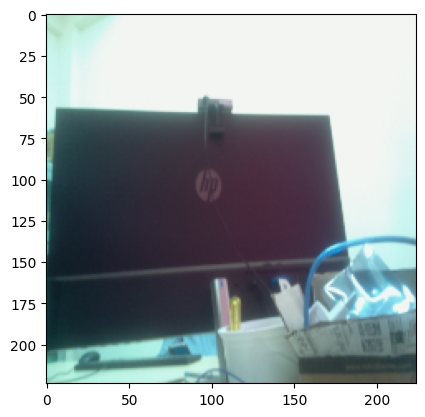


	[Prediction]     [Probability]

	laptop              : 34%
	projector           : 15%
	modem               : 10%
	digital clock       : 10%
	notebook            : 4%
CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.3 µs


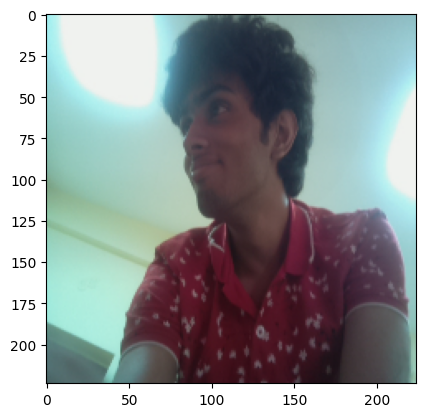


	[Prediction]     [Probability]

	sea cucumber        : 9%
	electric ray        : 7%
	starfish            : 6%
	bathtub             : 4%
	lighter             : 3%
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs


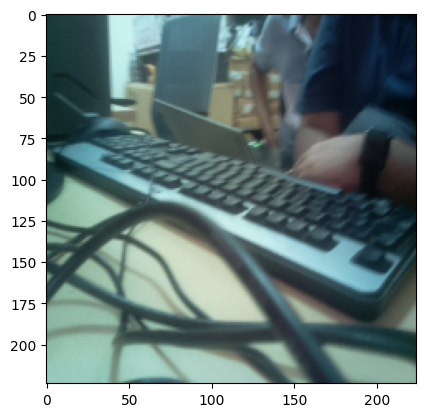


	[Prediction]     [Probability]

	computer keyboard   : 35%
	mouse               : 25%
	notebook            : 12%
	stethoscope         : 4%
	laptop              : 4%
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


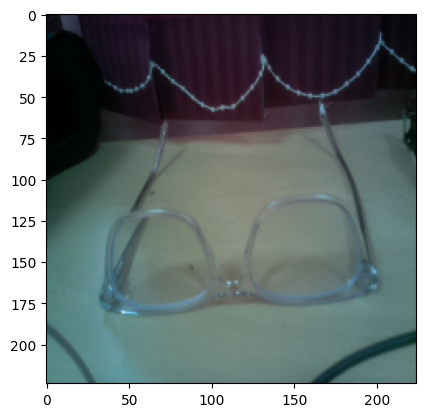


	[Prediction]     [Probability]

	oxygen mask         : 80%
	shower curtain      : 1%
	stethoscope         : 1%
	snorkel             : 1%
	oscilloscope        : 1%


In [26]:
import os
from os import listdir


image_dir = "./images"
for images in os.listdir(image_dir):
  image_path = image_dir + "/" + images
  %time
  image = preprocess(image_path)
  image_classify(image, labels)